<center>

## Innovation Diffusion Analysis | Merrell SpeedARC Surge BOA (A Slimmer Hiking Shoe)

</center>


<p align="center">
  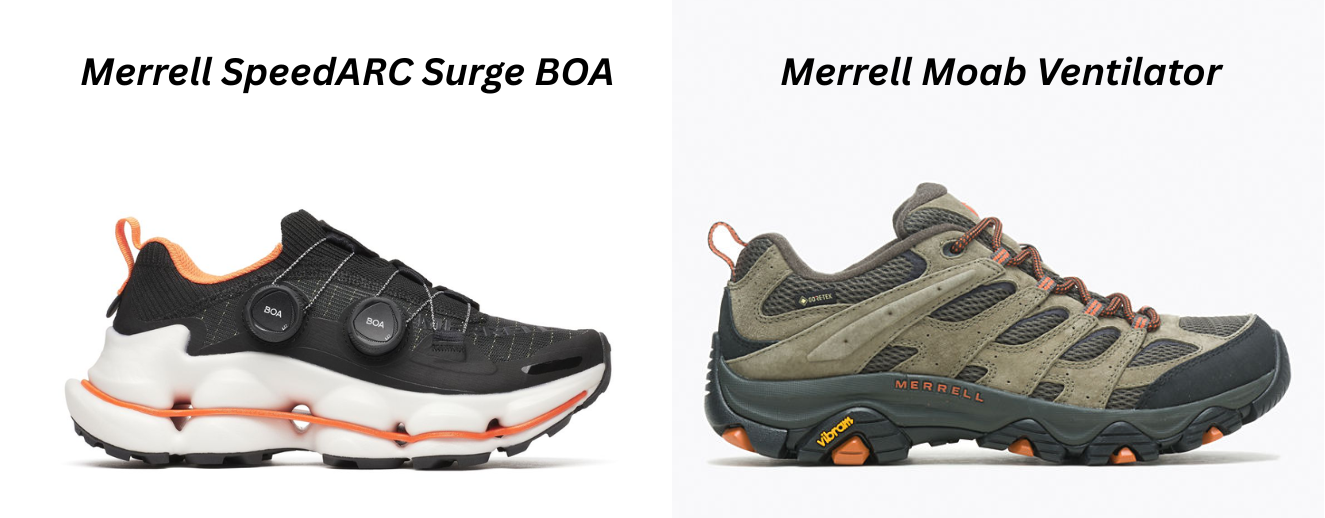
  <br>
</p>

### Selected Innovation

For this study, I have chosen the following innovation: **A Slimmer Hiking Shoe: Merrell SpeedARC Surge BOA**, featured in TIME’s Best Inventions of 2024 [TIME, 2024](https://time.com/7094735/merrell-speedarc-surge-boa/). The model represents Merrell’s latest step for combining performance running technology with hiking durability. According to the ISPO Award jury, this shoe model integrates a nylon flexplate positioned between layers of dual-density supercritical foam, delivering a balance of stability and energy return, while employing a dual BOA® Fit System for micro-adjustable tightening at both the heel and forefoot ([ISPO, 2024](https://www.ispo.com/en/promotion/ispo-award-winner-merrell-speedarc-surge-boa)). The design reflects modern consumer trends emphasizing comfort, sustainability, and responsiveness. By merging athletic shoe technology with outdoor performance, the SpeedARC Surge BOA marks a major evolution in hybrid hiking footwear design.

### Comparable Past Innovation

To study how this new hiking shoe might spread in the market, a similar past innovation was chosen: **Merrell Moab Ventilator Hiking Shoe**, which was first released in 2007. “Moab” stands for 'Mother Of All Boots' and shows Merrell’s idea of making hiking shoes that were lighter, more breathable, and more comfortable than traditional heavy boots. The Moab was special because it made hiking boots easier to wear by combining the comfort of running shoes with the strength of traditional hiking boots. The SpeedARC develops this idea further using new materials and design updates.  

In terms of market success, the Merrell Moab became one of the world’s best-selling hiking shoes, with more than 20 million people owning a pair according to Merrell’s press release ([Merrell, 2021](https://www.prnewswire.com/news-releases/merrell-debuts-extensions-of-its-most-popular-hiking-boot-franchise-with-the-moab-speed-and-moab-flight-301254309.html)). GearPatrol also reports that over 25 million pairs have been sold globally ([GearPatrol, 2024](https://www.gearpatrol.com/outdoors/introducing-merrell-moab-3-waterproof-camo/)). The new SpeedARC enters a market that already values light and comfortable hiking footwear but looks for new technology and energy efficiency. While the Moab helped more people start hiking by making shoes easier to wear, the SpeedARC aims to make hiking faster, smoother, and more advanced through modern materials. Together, they show how hiking footwear keeps evolving as new innovations build on the success of older ones.

### Historical Dataset Selection


To analyze how the past innovation might have spread, I looked for a time series dataset reflecting adoption trends in a related product category. Since direct sales for the Moab line aren’t publicly available, I used Statista to retrive the data in xlsx format.

I selected two datasets in the U.S. athletic footwear market, which reasonably include hiking footwear trends:

- **Revenue** of the athletic footwear segment in the United States (2018–2030), in billion USD.  
  Available at: <https://www.statista.com/forecasts/246496/athletic-footwear-industy-revenue>  
- **Volume** of the athletic footwear segment in the United States (2018–2030), in millions of pairs.  
  Available at: <https://www.statista.com/forecasts/1381132/athletic-footwear-industy-volume>

These time series provide continuous, year-by-year values that can serve as proxies for diffusion of hiking-shoe innovations. The revenue series shows the economic growth aspect, while the volume series approximates actual units sold (i.e. number of adopters).  Because these trends reflect how consumer demand for performance footwear evolves over time, they are suitable inputs for the Bass Diffusion Model.

### Scope of Analysis
For this analysis, I decided to focus on a country-specific scope, using data from the United States. This choice is based on the fact that the historical dataset used for the Bass Model revenue and volume data for the athletic footwear market is specific to the U.S. market. Since Merrell is an American brand originally founded in Michigan, its core customer base and most of its product launches, including the SpeedARC Surge BOA, are primarily targeted at the U.S. outdoor footwear segment. Analyzing diffusion within a single country helps capture more realistic adoption behavior, since consumer preferences, marketing strategies, and innovation diffusion rates can differ widely across countries. 

###  Estimation of Bass Model parameters

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from helper_functions import bass_new_adopters, bass_model, fit_bass_model, fit_bass_model_a, residuals, plot_bass_fit


In [2]:
df_rev = pd.read_excel(
    r"C:\Users\Admin\Desktop\DS 223 Marketing Analytics Assignments\DS 223 Homework 1\data\athletic_footwear_revenue_us_2018_2030.xlsx",
    sheet_name=1,  
    header=None,
    usecols="B:C",  
    skiprows=5,     
    nrows=13        
)

In [3]:
df_rev.columns = ["Year", "Revenue"]
df_rev = df_rev.dropna().reset_index(drop=True)
df_rev["Year"] = df_rev["Year"].astype(int)
df_rev["Revenue"] = df_rev["Revenue"].astype(float)

In [4]:
df_vol = pd.read_excel(
    r"C:\Users\Admin\Desktop\DS 223 Marketing Analytics Assignments\DS 223 Homework 1\data\athletic_footwear_volume_us_2018_2030.xlsx",
    sheet_name=1,
    header=None,
    usecols="B:C",
    skiprows=5,
    nrows=13
)

In [5]:
df_vol.columns = ["Year", "Volume"]
df_vol = df_vol.dropna().reset_index(drop=True)
df_vol["Year"] = df_vol["Year"].astype(int)
df_vol["Volume"] = df_vol["Volume"].astype(float)

In [6]:
merged = pd.merge(df_rev, df_vol, on="Year")
display(merged)

,Year,Revenue,Volume
0,2018,10.44,83.32
1,2019,10.82,85.93
2,2020,9.47,77.12
3,2021,10.17,79.80
4,2022,10.50,78.58
5,2023,10.55,78.72
6,2024,10.57,79.39
7,2025,10.78,80.24
8,2026,10.97,81.00
9,2027,11.15,81.68


In [7]:
p_r, q_r, M_r, r2_r, y_fit_r = fit_bass_model(df_rev["Revenue"])
p_v, q_v, M_v, r2_v, y_fit_v = fit_bass_model(df_vol["Volume"])

In [8]:
comparison = pd.DataFrame({
    "Dataset": ["Revenue (billion USD)", "Volume (million pairs)"],
    "p": [p_r, p_v],
    "q": [q_r, q_v],
    "M": [M_r, M_v],
    "R²": [r2_r, r2_v]
})
display(comparison.round(4))

,Dataset,p,q,M,R²
0,Revenue (billion USD),0.0014,0.0131,6992.5,0.6593
1,Volume (million pairs),0.0015,0.0027,52712.5,0.0212


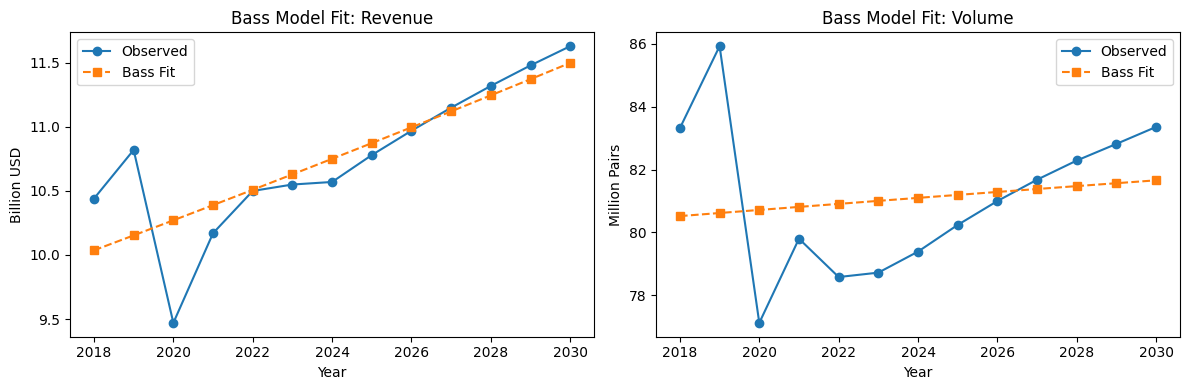

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Revenue
ax[0].plot(df_rev["Year"], df_rev["Revenue"], 'o-', label="Observed")
ax[0].plot(df_rev["Year"], y_fit_r, 's--', label="Bass Fit")
ax[0].set_title("Bass Model Fit: Revenue")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Billion USD")
ax[0].legend()

# Volume
ax[1].plot(df_vol["Year"], df_vol["Volume"], 'o-', label="Observed")
ax[1].plot(df_vol["Year"], y_fit_v, 's--', label="Bass Fit")
ax[1].set_title("Bass Model Fit: Volume")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Million Pairs")
ax[1].legend()

plt.tight_layout()
plt.show()

In [10]:
df_rev["Cumulative_Revenue"] = df_rev["Revenue"].cumsum()
df_vol["Cumulative_Volume"] = df_vol["Volume"].cumsum()

In [11]:
p_r, q_r, M_r, rev_pred = fit_bass_model_a(df_rev, "Cumulative_Revenue")
p_v, q_v, M_v, vol_pred = fit_bass_model_a(df_vol, "Cumulative_Volume")

In [12]:
print(f"Revenue: p: {p_r:.4f}, q: {q_r:.4f}, M: {M_r:.2f}")
print(f"Volume: p: {p_v:.4f}, q: {q_v:.4f}, M: {M_v:.2f}")

Revenue: p: 0.0154, q: -0.0153, M: 880.16
Volume: p: 0.0233, q: -0.0233, M: 4715.49


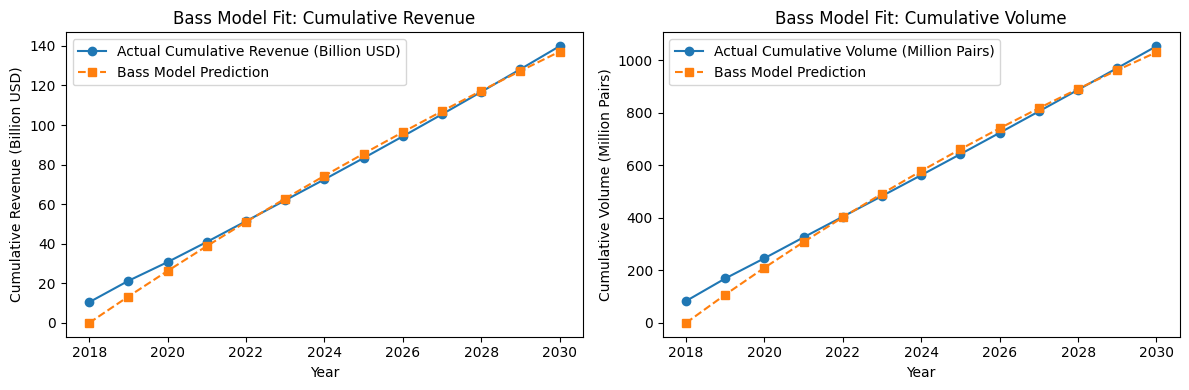

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_bass_fit(df_rev, "Cumulative_Revenue", rev_pred, "Bass Model Fit: Cumulative Revenue", "Cumulative Revenue (Billion USD)")

plt.subplot(1, 2, 2)
plot_bass_fit(df_vol, "Cumulative_Volume", vol_pred, "Bass Model Fit: Cumulative Volume", "Cumulative Volume (Million Pairs)")

plt.tight_layout()
plt.show()

I have performed two versions of Bass model. The first version used annual data (non-cumulative), showing year-to-year changes in revenue and sales volume. This version helps to see short-term patterns, such as small increases or drops in specific years, but it looks a bit noisy because yearly data can fluctuate due to external factors like economic conditions or consumer trends. The second version used cumulative data, which adds up values over time and shows the overall growth of the market. This version produced a much smoother and more stable S-shaped curve, which is typical for diffusion models and represents how products gradually reach market saturation. Since the cumulative Bass model better reflects the long-term adoption process, it was chosen for further analysis and forecasting.

### Prediction of the Diffusion

In [14]:
p_speedarc = p_v
q_speedarc = q_v
M_speedarc = M_v

In [15]:
years = np.arange(2024, 2035)
t = np.arange(len(years))

In [16]:
F_hat = bass_model(t, p_speedarc, q_speedarc, M_speedarc)

In [17]:
N_hat = np.empty_like(F_hat)
N_hat[0] = F_hat[0]
N_hat[1:] = F_hat[1:] - F_hat[:-1]

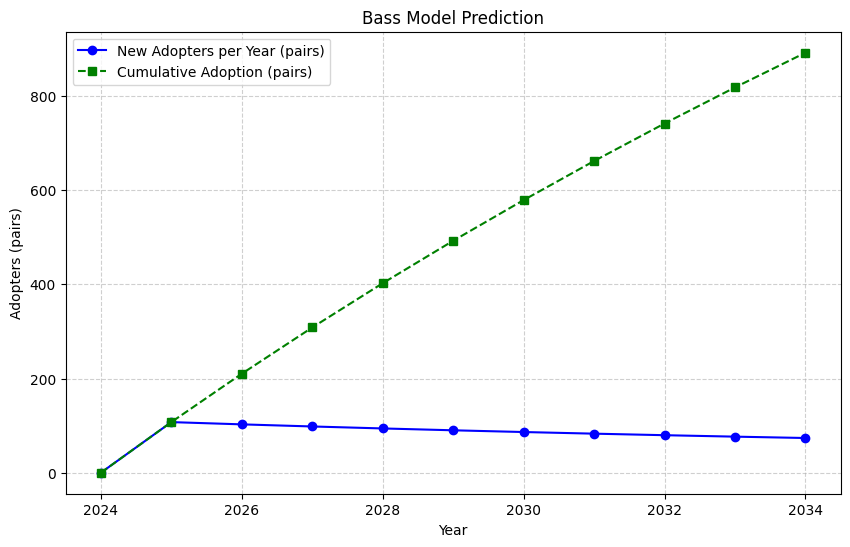

In [18]:
plt.figure(figsize=(10,6))
plt.plot(years, N_hat, 'o-', color='blue', label='New Adopters per Year (pairs)')
plt.plot(years, F_hat, 's--', color='green', label='Cumulative Adoption (pairs)')
plt.xlabel("Year")
plt.ylabel("Adopters (pairs)")
plt.title("Bass Model Prediction")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In this graph, I can see that the diffusion pattern doesn’t clearly show the traditional S-shape that the Bass Model usually predicts. Instead, the cumulative adoption line (in green) looks almost linear, which means adoption is increasing steadily over time rather than accelerating sharply. This likely happens because my data only covers the years 2024 to 2034, a relatively short time span that captures only the early stage of the product’s life cycle. The coefficients of innovation and imitation are also quite small and close to each other, showing that the product’s growth depends more on gradual awareness than on rapid imitation or word-of-mouth effects. As a result, the number of new adopters per year (the blue line) decreases slowly instead of forming the typical hump seen in longer, more mature diffusion patterns. 

### Number of Adopters by Period

In [19]:
N_hat = np.diff(np.insert(F_hat, 0, 0))

In [20]:
df_period = pd.DataFrame({
    "Year": years,
    "New_Adopters": N_hat.round().astype(int)
})

In [21]:
display(df_period)

,Year,New_Adopters
0,2024,0
1,2025,107
2,2026,103
3,2027,98
4,2028,94
5,2029,90
6,2030,86
7,2031,83
8,2032,80
9,2033,77


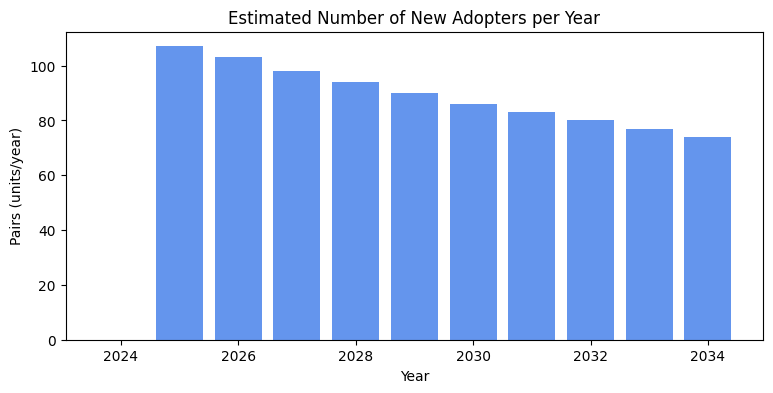

In [22]:
plt.figure(figsize=(9,4))
plt.bar(df_period["Year"], df_period["New_Adopters"], color="cornflowerblue")
plt.title("Estimated Number of New Adopters per Year")
plt.xlabel("Year"); plt.ylabel("Pairs (units/year)")
plt.show()

### Conclusion

This analysis explored how the new Merrell SpeedARC Surge BOA hiking shoe might spread in the market by comparing it with an older innovation the Merrell Moab Ventilator (2007) using the Bass Diffusion Model. Since exact sales data for hiking shoes were not available, U.S. athletic footwear revenue and volume (2018–2030) from Statista were used as close estimates. These datasets helped to model how consumer adoption evolves over time in a related footwear category.Two approaches were tested: one using annual values and another using cumulative data. The cumulative version produced a plot that better represented long-term adoption behavior, while the yearly version looked more irregular due to short-term market changes. The estimated coefficients were both small and nearly equal, showing that adoption is mostly driven by steady awareness and marketing rather than strong word-of-mouth effects.

When projecting adoption for the SpeedARC model (2024–2034), the curve appeared almost linear instead of a typical steep S-shape. This happens because the data only cover the early growth phase, so the model doesn’t capture the later acceleration or market saturation. The annual number of new adopters slightly decreases each year, suggesting gradual but consistent interest rather than explosive growth.Overall, the results indicate that the SpeedARC Surge BOA is still in the early diffusion stage. Its adoption will likely rise slowly as consumers recognize its comfort and advanced technology, following the pattern seen in the Moab’s early success. A longer time series or global dataset could provide a clearer view of how the innovation spreads in later stages.

### References

1. **TIME** (2024). *A Slimmer Hiking Shoe — Merrell SpeedARC Surge BOA.* TIME’s Best Inventions 2024.  
   Retrieved from [https://time.com/collection/best-inventions-2024/](https://time.com/collection/best-inventions-2024/)

2. **ISPO** (2024). *ISPO Award Winner: Merrell SpeedARC Surge BOA.*  
   Retrieved from [https://www.ispo.com/en/promotion/ispo-award-winner-merrell-speedarc-surge-boa](https://www.ispo.com/en/promotion/ispo-award-winner-merrell-speedarc-surge-boa)

3. **Merrell** (2021). *Merrell Debuts Extensions of Its Most Popular Hiking Boot Franchise with the Moab Speed and Moab Flight.* PR Newswire.  
   Retrieved from [https://www.prnewswire.com/news-releases/merrell-debuts-extensions-of-its-most-popular-hiking-boot-franchise-with-the-moab-speed-and-moab-flight-301254309.html](https://www.prnewswire.com/news-releases/merrell-debuts-extensions-of-its-most-popular-hiking-boot-franchise-with-the-moab-speed-and-moab-flight-301254309.html)

4. **GearPatrol** (2024). *Merrell Moab 3 Waterproof Camo Review.*  
   Retrieved from [https://www.gearpatrol.com/outdoors/introducing-merrell-moab-3-waterproof-camo/](https://www.gearpatrol.com/outdoors/introducing-merrell-moab-3-waterproof-camo/)

5. **Statista** (2024a). *Revenue in the Athletic Footwear Segment in the United States from 2018 to 2030 (in billion U.S. dollars).*  
   Retrieved from [https://www.statista.com/forecasts/246496/athletic-footwear-industy-revenue](https://www.statista.com/forecasts/246496/athletic-footwear-industy-revenue)

6. **Statista** (2024b). *Volume in the Athletic Footwear Segment in the United States from 2018 to 2030 (in millions).*  
   Retrieved from [https://www.statista.com/forecasts/1381132/athletic-footwear-industy-volume](https://www.statista.com/forecasts/1381132/athletic-footwear-industy-volume)

7. **Course Slides** (2024). *DS-223: Bass Model.* [PDF file]. American University of Armenia.
